In [106]:
import pandas as pd
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from sklearn.neighbors import KNeighborsClassifier

In [107]:
data = pd.read_csv('main_dataset.csv')

In [108]:
data

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,...,5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,EUR,100,1,3.07,28,11.0,...,4435,3.696054,54d83b6b6b8a771e478558de,0,NaN,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,https://contestimg.wish.com/api/webimage/5eccd...,5eccd22b4497b86fd48f16b4,summer,2020-08
1570,Nouveautés Hommes Siwmwear Beach-Shorts Hommes...,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,EUR,100,0,3.71,59,24.0,...,210,3.961905,5b42da1bf64320209fc8da69,0,NaN,https://www.wish.com/c/5e74be96034d613d42b52dfe,https://contestimg.wish.com/api/webimage/5e74b...,5e74be96034d613d42b52dfe,summer,2020-08
1571,Mode femmes d'été sans manches robes col en V ...,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,EUR,100,0,2.50,2,0.0,...,31,3.774194,5d56b32c40defd78043d5af9,0,NaN,https://www.wish.com/c/5eda07ab0e295c2097c36590,https://contestimg.wish.com/api/webimage/5eda0...,5eda07ab0e295c2097c36590,summer,2020-08


In [109]:
data.duplicated().any()

True

In [110]:
data=data.drop_duplicates()

In [111]:
data

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,...,5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,EUR,100,1,3.07,28,11.0,...,4435,3.696054,54d83b6b6b8a771e478558de,0,NaN,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,https://contestimg.wish.com/api/webimage/5eccd...,5eccd22b4497b86fd48f16b4,summer,2020-08
1570,Nouveautés Hommes Siwmwear Beach-Shorts Hommes...,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,EUR,100,0,3.71,59,24.0,...,210,3.961905,5b42da1bf64320209fc8da69,0,NaN,https://www.wish.com/c/5e74be96034d613d42b52dfe,https://contestimg.wish.com/api/webimage/5e74b...,5e74be96034d613d42b52dfe,summer,2020-08
1571,Mode femmes d'été sans manches robes col en V ...,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,EUR,100,0,2.50,2,0.0,...,31,3.774194,5d56b32c40defd78043d5af9,0,NaN,https://www.wish.com/c/5eda07ab0e295c2097c36590,https://contestimg.wish.com/api/webimage/5eda0...,5eda07ab0e295c2097c36590,summer,2020-08


In [112]:
data["currency_buyer"].value_counts()

EUR    1539
Name: currency_buyer, dtype: int64

In [113]:
data["currency_buyer"].nunique()

1

In [114]:
# .nunique () compte le nb de valeur unique dans le dataframe
#le pourcentage de valeur unique
1- (data["currency_buyer"].nunique() /len(data["currency_buyer"]))*100

0.9350227420402859

In [115]:
data.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [116]:
data[['badge_product_quality', 'badge_fast_shipping']].value_counts()

badge_product_quality  badge_fast_shipping
0                      0                      1407
1                      0                       112
0                      1                        18
1                      1                         2
dtype: int64

In [117]:
target= data["units_sold"]

features = data[['price', 'retail_price',  'uses_ad_boosts',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'has_urgency_banner', 'merchant_rating']]

In [118]:
features.isna().sum()

price                    0
retail_price             0
uses_ad_boosts           0
rating_five_count       43
rating_four_count       43
rating_three_count      43
rating_two_count        43
rating_one_count        43
has_urgency_banner    1071
merchant_rating          0
dtype: int64

In [121]:
#features.dropna(thresh=6, inplace=True)
features = features[~features["rating_five_count"].isna()]

In [122]:
features.loc[features.duplicated(keep=False),:]

,price,retail_price,uses_ad_boosts,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,has_urgency_banner,merchant_rating


In [123]:
features

,price,retail_price,uses_ad_boosts,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,has_urgency_banner,merchant_rating
0,16.00,14,0,26.0,8.0,10.0,1.0,9.0,1.0,4.128521
1,8.00,22,1,2269.0,1027.0,1118.0,644.0,1077.0,1.0,3.899673
2,8.00,43,0,5.0,4.0,2.0,0.0,3.0,1.0,3.989831
3,8.00,8,1,295.0,119.0,87.0,42.0,36.0,NaN,4.020435
4,2.72,3,1,6.0,4.0,2.0,2.0,6.0,1.0,4.001588
...,...,...,...,...,...,...,...,...,...,...
1568,6.00,9,1,722.0,293.0,185.0,77.0,90.0,NaN,4.224605
1569,2.00,56,1,11.0,3.0,1.0,3.0,10.0,1.0,3.696054
1570,5.00,19,0,24.0,15.0,8.0,3.0,9.0,NaN,3.961905
1571,13.00,11,0,0.0,1.0,0.0,0.0,1.0,NaN,3.774194


In [124]:
features["has_urgency_banner"] = features["has_urgency_banner"].fillna(0).astype(int)

In [50]:
features[[x for x in features.columns if x not in ["price" ,"merchant_rating"]]] = features[[x for x in features.columns if x not in ["price" ,"merchant_rating"]]].astype(int)

In [65]:
features.describe()

,price,retail_price,uses_ad_boosts,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,has_urgency_banner,merchant_rating
count,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000
mean,8.365000,23.351604,0.435829,450.738636,183.036096,137.152406,64.948529,97.577540,0.304144,4.035292
std,3.949523,30.549538,0.496031,988.686287,403.989857,314.441561,152.701473,215.954317,0.460198,0.196281
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.941176
25%,5.830000,7.000000,0.000000,13.000000,5.000000,4.000000,2.000000,4.000000,0.000000,3.924683
50%,8.000000,10.000000,0.000000,84.000000,33.000000,26.000000,12.000000,21.000000,0.000000,4.045170
75%,11.000000,26.000000,1.000000,431.000000,171.000000,134.000000,64.000000,97.000000,1.000000,4.163377
max,49.000000,252.000000,1.000000,11548.000000,4152.000000,3658.000000,2003.000000,2789.000000,1.000000,4.577519


In [95]:
print (features.index[features['rating_five_count'] == 11548])

Int64Index([84], dtype='int64')


85


<AxesSubplot:>

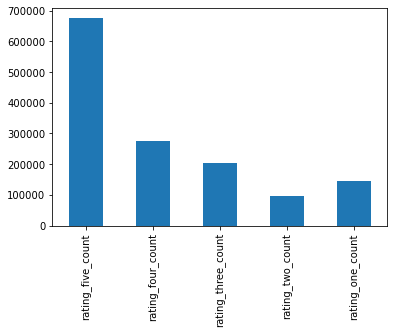

In [86]:
features[['rating_five_count','rating_four_count','rating_three_count','rating_two_count','rating_one_count']].sum().plot(kind='bar')


In [97]:
features[['rating_five_count','rating_four_count','rating_three_count','rating_two_count','rating_one_count']].sum()

rating_five_count     674305
rating_four_count     273822
rating_three_count    205180
rating_two_count       97163
rating_one_count      145976
dtype: int64

In [51]:
#  test spearman correlation 
'rating', 'rating_count'

('rating', 'rating_count')

In [52]:
features

,price,retail_price,uses_ad_boosts,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,has_urgency_banner,merchant_rating
0,16.00,14,0,26,8,10,1,9,1,4.128521
1,8.00,22,1,2269,1027,1118,644,1077,1,3.899673
2,8.00,43,0,5,4,2,0,3,1,3.989831
3,8.00,8,1,295,119,87,42,36,0,4.020435
4,2.72,3,1,6,4,2,2,6,1,4.001588
...,...,...,...,...,...,...,...,...,...,...
1568,6.00,9,1,722,293,185,77,90,0,4.224605
1569,2.00,56,1,11,3,1,3,10,1,3.696054
1570,5.00,19,0,24,15,8,3,9,0,3.961905
1571,13.00,11,0,0,1,0,0,1,0,3.774194


In [53]:
features["interval"] = pd.qcut(target,3)

In [54]:
features["interval"].value_counts()

(100.0, 5000.0]       619
(0.999, 100.0]        575
(5000.0, 100000.0]    302
Name: interval, dtype: int64

In [134]:
data_crosstab_2= pd.crosstab(features["uses_ad_boosts"],features["has_urgency_banner"])
data_crosstab_2

has_urgency_banner,0,1
uses_ad_boosts,,
0,591,253
1,450,202


In [161]:
# KHI-2 with Scipy
#uses_ad_boosts	#has_urgency_banner
resultats=chi2_contingency(data_crosstab_2,correction=False)
resultats

(0.17564822599410496,
 0.6751400724114889,
 1,
 array([[587.30213904, 256.69786096],
        [453.69786096, 198.30213904]]))

In [153]:
import inspect
inspect.getsource(chi2_contingency)

'def chi2_contingency(observed, correction=True, lambda_=None):\n    """Chi-square test of independence of variables in a contingency table.\n\n    This function computes the chi-square statistic and p-value for the\n    hypothesis test of independence of the observed frequencies in the\n    contingency table [1]_ `observed`.  The expected frequencies are computed\n    based on the marginal sums under the assumption of independence; see\n    `scipy.stats.contingency.expected_freq`.  The number of degrees of\n    freedom is (expressed using numpy functions and attributes)::\n\n        dof = observed.size - sum(observed.shape) + observed.ndim - 1\n\n\n    Parameters\n    ----------\n    observed : array_like\n        The contingency table. The table contains the observed frequencies\n        (i.e. number of occurrences) in each category.  In the two-dimensional\n        case, the table is often described as an "R x C table".\n    correction : bool, optional\n        If True, *and* the de

In [156]:
print("Statistiques:",resultats[0])
print ("p_value",resultats[1])
print("degré de liberté",resultats[2])
print(resultats)

Statistiques: 0.1313595847697057
p_value 0.7170265190462584
degré de liberté 1
(0.1313595847697057, 0.7170265190462584, 1, array([[587.30213904, 256.69786096],
       [453.69786096, 198.30213904]]))


In [138]:
data_crosstab= pd.crosstab(features["uses_ad_boosts"],features["has_urgency_banner"], margins=True, margins_name="Total")
data_crosstab

has_urgency_banner,0,1,Total
uses_ad_boosts,,,
0,591,253,844
1,450,202,652
Total,1041,455,1496


In [159]:
# KHI-2
#uses_ad_boosts	#has_urgency_banner
alpha = 0.05
# Calcualtion of Chisquare
chi_square = 0
rows = features['uses_ad_boosts'].unique()
columns = features['has_urgency_banner'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."

print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 0.17564822599410496  and p value is: 0.6751400724114889
Failed to reject the null hypothesis.


In [160]:
chi_square

0.17564822599410496

In [59]:
no_boost = features["price"][features["uses_ad_boosts"] ==0]

In [60]:
# ANOVA
#price  #uses_ad_boosts	
#price #has_urgency_banner
no_ad = features["price"][features["uses_ad_boosts"] ==0]
with_ad = features["price"][features["uses_ad_boosts"] ==1]
stats.f_oneway(no_ad,with_ad)

F_onewayResult(statistic=10.054881527608119, pvalue=0.0015503070045967558)

In [61]:
no_urg = features["price"][features["has_urgency_banner"] ==0]
with_urg = features["price"][features["has_urgency_banner"] ==1]
stats.f_oneway(no_urg,with_urg)

F_onewayResult(statistic=0.5892834169799668, pvalue=0.4428176540332138)

In [91]:
pd.DataFrame(pearsonr(features["merchant_rating"],features["rating_five_count"]),
index = ['pearson_coeff','p-value'],
columns = ['resultats'])

,resultats
pearson_coeff,1.682994e-01
p-value,5.721041e-11


In [62]:
# Spearman 
price rating_five_count	
price rating_four_count	
price rating_three_count	
price rating_two_count	
price rating_one_count

SyntaxError: invalid syntax (2834285053.py, line 2)

In [63]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

table [features[]]

SyntaxError: invalid syntax (4001633983.py, line 4)

In [64]:
# contingency table
table = [	[10, 20, 30],
			[6,  9,  17]]
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

[[10, 20, 30], [6, 9, 17]]
dof=2
[[10.43478261 18.91304348 30.65217391]
 [ 5.56521739 10.08695652 16.34782609]]


NameError: name 'chi2' is not defined

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
>>> neigh.fit(X, y)